In [46]:
import os
import sys
import glob

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from matplotlib_venn import venn2, venn3

mpl.rcParams['pdf.fonttype'] = 42  # To avoid type3 fonts in PDFs
mpl.rcParams['ps.fonttype'] = 42

In [47]:
sys.path.append("/cellar/users/aklie/data/datasets/tf_perturb_seq/config")
from loader import load_colors

In [48]:
dataset_colors = load_colors("technology-benchmark_WTC11_TF-Perturb-seq", "dataset_colors")
dataset_order = load_colors("technology-benchmark_WTC11_TF-Perturb-seq", "dataset_order")

In [49]:
dataset_colors, dataset_colors

({'Hon_WTC11-benchmark_TF-Perturb-seq': '#5B8FF9',
  'Huangfu_WTC11-benchmark_TF-Perturb-seq': '#F6BD16',
  'Gersbach_WTC11-benchmark_TF-Perturb-seq_GEM-Xv3': '#5AD8A6',
  'Gersbach_WTC11-benchmark_TF-Perturb-seq_HTv2': '#E86452'},
 {'Hon_WTC11-benchmark_TF-Perturb-seq': '#5B8FF9',
  'Huangfu_WTC11-benchmark_TF-Perturb-seq': '#F6BD16',
  'Gersbach_WTC11-benchmark_TF-Perturb-seq_GEM-Xv3': '#5AD8A6',
  'Gersbach_WTC11-benchmark_TF-Perturb-seq_HTv2': '#E86452'})

In [50]:
path_out = "/cellar/users/aklie/data/datasets/tf_perturb_seq/datasets/technology-benchmark_WTC11_TF-Perturb-seq/results/qc/2026_01_14/intended_target"

# Get all results

In [51]:
files = [
    "/cellar/users/aklie/data/datasets/tf_perturb_seq/datasets/Gersbach_WTC11-benchmark_TF-Perturb-seq_GEM-Xv3/results/2_qc/2026_01_14/qc/intended_target/Gersbach_WTC11-benchmark_TF-Perturb-seq_GEM-Xv3.intended_target_results.tsv",
    "/cellar/users/aklie/data/datasets/tf_perturb_seq/datasets/Gersbach_WTC11-benchmark_TF-Perturb-seq_HTv2/results/2_qc/2026_01_14/qc/intended_target/Gersbach_WTC11-benchmark_TF-Perturb-seq_HTv2.intended_target_results.tsv",
    "/cellar/users/aklie/data/datasets/tf_perturb_seq/datasets/Hon_WTC11-benchmark_TF-Perturb-seq/results/2_qc/2026_01_14/qc/intended_target/Hon_WTC11-benchmark_TF-Perturb-seq.intended_target_results.tsv",
    "/cellar/users/aklie/data/datasets/tf_perturb_seq/datasets/Huangfu_WTC11-benchmark_TF-Perturb-seq/results/2_qc/2026_01_14/qc/intended_target/Huangfu_WTC11-benchmark_TF-Perturb-seq.intended_target_results.tsv"
]
files

['/cellar/users/aklie/data/datasets/tf_perturb_seq/datasets/Gersbach_WTC11-benchmark_TF-Perturb-seq_GEM-Xv3/results/2_qc/2026_01_14/qc/intended_target/Gersbach_WTC11-benchmark_TF-Perturb-seq_GEM-Xv3.intended_target_results.tsv',
 '/cellar/users/aklie/data/datasets/tf_perturb_seq/datasets/Gersbach_WTC11-benchmark_TF-Perturb-seq_HTv2/results/2_qc/2026_01_14/qc/intended_target/Gersbach_WTC11-benchmark_TF-Perturb-seq_HTv2.intended_target_results.tsv',
 '/cellar/users/aklie/data/datasets/tf_perturb_seq/datasets/Hon_WTC11-benchmark_TF-Perturb-seq/results/2_qc/2026_01_14/qc/intended_target/Hon_WTC11-benchmark_TF-Perturb-seq.intended_target_results.tsv',
 '/cellar/users/aklie/data/datasets/tf_perturb_seq/datasets/Huangfu_WTC11-benchmark_TF-Perturb-seq/results/2_qc/2026_01_14/qc/intended_target/Huangfu_WTC11-benchmark_TF-Perturb-seq.intended_target_results.tsv']

In [52]:
# Load in and concatenate all res
all_res = []
for f in files:
    df = pd.read_csv(f, sep="\t")
    all_res.append(df)
    df["dataset"] = f.split("/")[-7]

del df

all_res_df = pd.concat(all_res)
all_res_df["lab"] = all_res_df["dataset"].replace("_WTC11-benchmark_TF-Perturb-seq", "", regex=True)
all_res_df = all_res_df.rename(columns={"perturbo_log2_fc": "log2_fc", "perturbo_p_value": "p_value"})
all_res_df.reset_index(drop=True, inplace=True)
all_res_df.head()

,guide_id,gene_name,label,log2_fc,p_value,dataset,lab
0,CD81#strong,CD81,positive_control,-2.565397,6.747870e-296,Gersbach_WTC11-benchmark_TF-Perturb-seq_GEM-Xv3,Gersbach_GEM-Xv3
1,CD81#weak,CD81,positive_control,-2.279945,0.000000e+00,Gersbach_WTC11-benchmark_TF-Perturb-seq_GEM-Xv3,Gersbach_GEM-Xv3
2,CD151#strong,CD151,positive_control,-2.497311,2.642758e-201,Gersbach_WTC11-benchmark_TF-Perturb-seq_GEM-Xv3,Gersbach_GEM-Xv3
3,CD151#weak,CD151,positive_control,-1.415021,1.574354e-210,Gersbach_WTC11-benchmark_TF-Perturb-seq_GEM-Xv3,Gersbach_GEM-Xv3
4,CD55#strong,CD55,positive_control,-2.356340,2.262932e-67,Gersbach_WTC11-benchmark_TF-Perturb-seq_GEM-Xv3,Gersbach_GEM-Xv3


In [53]:
pd.crosstab(all_res_df["lab"], all_res_df["label"])

label,negative_control,non_targeting,positive_control,tf_targeting
lab,,,,
Gersbach_GEM-Xv3,54,30,8,324
Gersbach_HTv2,54,30,8,324
Hon,54,30,8,324
Huangfu,54,30,8,324


In [54]:
# Calculate FC from log2 FC
all_res_df["fc"] = 2 ** all_res_df["log2_fc"]

In [55]:
# Save out
path_all_res = os.path.join(path_out, "all_datasets_inference_results.tsv")
all_res_df.to_csv(path_all_res, sep="\t", index=False)

In [56]:
# Find any guides that are NaN across all possible dataset values
nan_guides = all_res_df.groupby("guide_id")["log2_fc"].apply(lambda x: x.isna().all())
nan_guides = nan_guides[nan_guides].index.tolist()
nan_guides

['BATF#chr14:75522489-75522507(-)',
 'BATF#chr14:75522501-75522519(+)',
 'BATF#chr14:75522513-75522531(+)',
 'BATF#chr14:75522520-75522538(+)',
 'BATF#chr14:75522535-75522553(+)',
 'BATF#chr14:75522554-75522572(+)',
 'LEF1#chr4:108165900-108165918(-)',
 'LEF1#chr4:108166028-108166046(+)',
 'LEF1#chr4:108166189-108166207(+)',
 'LEF1#chr4:108166254-108166272(-)',
 'LEF1#chr4:108166263-108166281(+)',
 'LEF1#chr4:108166273-108166291(+)',
 'LEF1#chr4:108168675-108168693(-)',
 'LEF1#chr4:108168679-108168697(-)',
 'LEF1#chr4:108168727-108168745(-)',
 'LEF1#chr4:108168777-108168795(-)',
 'LEF1#chr4:108168834-108168852(+)',
 'LEF1#chr4:108168846-108168864(-)',
 'OR10J3#chr1:159314202-159314220(+)',
 'OR10J3#chr1:159314450-159314468(+)',
 'OR10J3#chr1:159314543-159314561(+)',
 'OR10J3#chr1:159314586-159314604(+)',
 'OR10J3#chr1:159314622-159314640(+)',
 'OR10J3#chr1:159314635-159314653(+)',
 'OR2A25#chr7:144074196-144074214(+)',
 'OR2A25#chr7:144074203-144074221(+)',
 'OR2A25#chr7:144074317-1440

In [57]:
# remove these guides from the dataframe
all_res_df = all_res_df[~all_res_df["guide_id"].isin(nan_guides)]

In [58]:
all_res_df

,guide_id,gene_name,label,log2_fc,p_value,dataset,lab,fc
0,CD81#strong,CD81,positive_control,-2.565397,6.747870e-296,Gersbach_WTC11-benchmark_TF-Perturb-seq_GEM-Xv3,Gersbach_GEM-Xv3,0.168942
1,CD81#weak,CD81,positive_control,-2.279945,0.000000e+00,Gersbach_WTC11-benchmark_TF-Perturb-seq_GEM-Xv3,Gersbach_GEM-Xv3,0.205906
2,CD151#strong,CD151,positive_control,-2.497311,2.642758e-201,Gersbach_WTC11-benchmark_TF-Perturb-seq_GEM-Xv3,Gersbach_GEM-Xv3,0.177106
3,CD151#weak,CD151,positive_control,-1.415021,1.574354e-210,Gersbach_WTC11-benchmark_TF-Perturb-seq_GEM-Xv3,Gersbach_GEM-Xv3,0.375004
4,CD55#strong,CD55,positive_control,-2.356340,2.262932e-67,Gersbach_WTC11-benchmark_TF-Perturb-seq_GEM-Xv3,Gersbach_GEM-Xv3,0.195286
...,...,...,...,...,...,...,...,...
1659,TFCP2L1#chr2:121284700-121284718(+),TFCP2L1,tf_targeting,NaN,NaN,Huangfu_WTC11-benchmark_TF-Perturb-seq,Huangfu,NaN
1660,TFCP2L1#chr2:121285141-121285159(+),TFCP2L1,tf_targeting,NaN,NaN,Huangfu_WTC11-benchmark_TF-Perturb-seq,Huangfu,NaN
1661,TFCP2L1#chr2:121284796-121284814(+),TFCP2L1,tf_targeting,NaN,NaN,Huangfu_WTC11-benchmark_TF-Perturb-seq,Huangfu,NaN
1662,TFCP2L1#chr2:121285161-121285179(+),TFCP2L1,tf_targeting,NaN,NaN,Huangfu_WTC11-benchmark_TF-Perturb-seq,Huangfu,NaN


# Plots

## Waterfall plot

In [59]:
hon_ds = "Hon_WTC11-benchmark_TF-Perturb-seq"

hon_df = (
    all_res_df[all_res_df["dataset"] == hon_ds]
    .loc[:, ["guide_id", "label", "log2_fc"]]
)

# Split by label class
pos = hon_df[hon_df["label"] == "positive_control"] \
    .sort_values("log2_fc", ascending=False)

tf = hon_df[hon_df["label"] == "tf_targeting"] \
    .sort_values("log2_fc", ascending=False)

guide_order = pd.concat([pos, tf])["guide_id"].tolist()

In [60]:
# Union of all guides
all_guides = pd.Index(guide_order, name="guide_id")

def reindex_dataset(d):
    out = (
        d.set_index("guide_id")
         .reindex(all_guides)
         .reset_index()
    )
    out["dataset"] = d["dataset"].iloc[0]
    return out

plot_df = (
    all_res_df.groupby("dataset", group_keys=False)
      .apply(reindex_dataset)
)

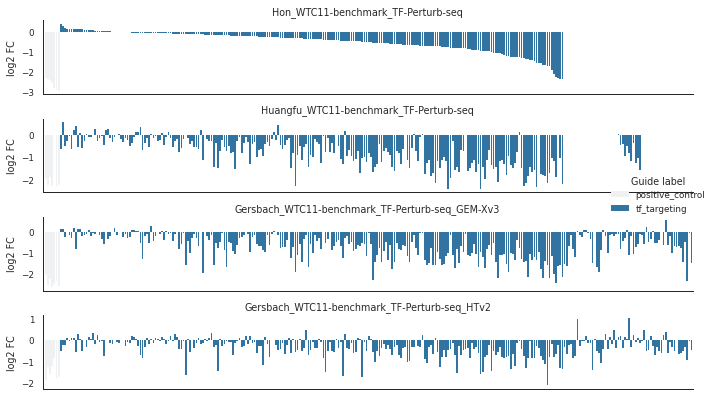

In [61]:
sns.set_context("paper")
sns.set_style("white")
g = sns.FacetGrid(
    plot_df,
    row="dataset",
    row_order=dataset_order,
    height=1.4,
    aspect=6,
    sharex=True,
    sharey=False,
)

g.map_dataframe(
    sns.barplot,
    x="guide_id",
    y="log2_fc",
    hue="label",
    dodge=False,
    edgecolor="none"
)

# Formatting
for ax in g.axes.flatten():
    ax.set_xticks([])
    ax.set_xlabel("")
    ax.set_ylabel("log2 FC")

g.set_titles(row_template="{row_name}")
g.add_legend(title="Guide label", bbox_to_anchor=(1.01, 0.5))

plt.tight_layout()
plt.show()

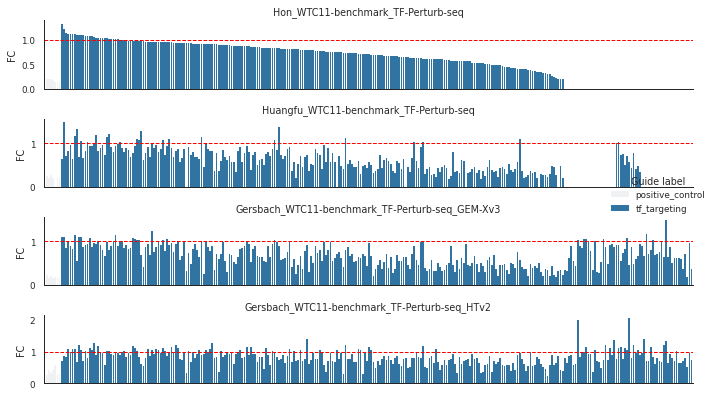

In [62]:
hon_ds = "Hon_WTC11-benchmark_TF-Perturb-seq"

hon_df = (
    all_res_df[all_res_df["dataset"] == hon_ds]
    .loc[:, ["guide_id", "label", "fc"]]
)

# Split by label class
pos = hon_df[hon_df["label"] == "positive_control"] \
    .sort_values("fc", ascending=False)

tf = hon_df[hon_df["label"] == "tf_targeting"] \
    .sort_values("fc", ascending=False)

guide_order = pd.concat([pos, tf])["guide_id"].tolist()
# Union of all guides
all_guides = pd.Index(guide_order, name="guide_id")

def reindex_dataset(d):
    out = (
        d.set_index("guide_id")
         .reindex(all_guides)
         .reset_index()
    )
    out["dataset"] = d["dataset"].iloc[0]
    return out

plot_df = (
    all_res_df.groupby("dataset", group_keys=False)
      .apply(reindex_dataset)
)
sns.set_context("paper")
sns.set_style("white")

g = sns.FacetGrid(
    plot_df,
    row="dataset",
    row_order=dataset_order,
    height=1.4,
    aspect=6,
    sharex=True,
    sharey=False,
)

g.map_dataframe(
    sns.barplot,
    x="guide_id",
    y="fc",
    hue="label",
    dodge=False,
    edgecolor="none"
)

# Formatting
for ax in g.axes.flatten():
    ax.set_xticks([])
    ax.set_xlabel("")
    ax.set_ylabel("FC")

    # Add in hline at 1.0
    ax.axhline(1.0, color="red", linestyle="--", linewidth=1)

g.set_titles(row_template="{row_name}")
g.add_legend(title="Guide label", bbox_to_anchor=(1.01, 0.5))

plt.tight_layout()
plt.show()

## Pairwise scatterplots

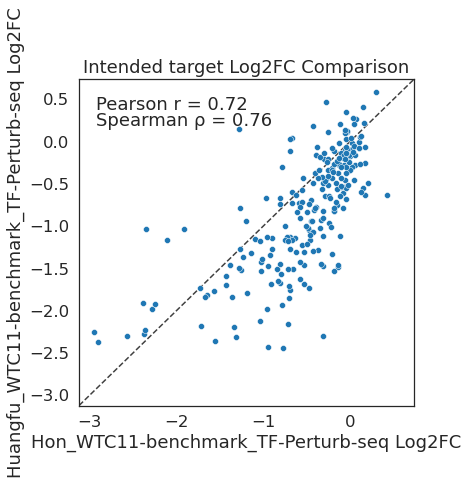

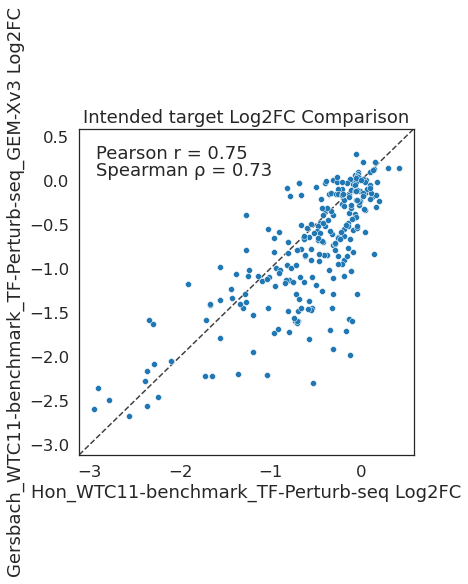

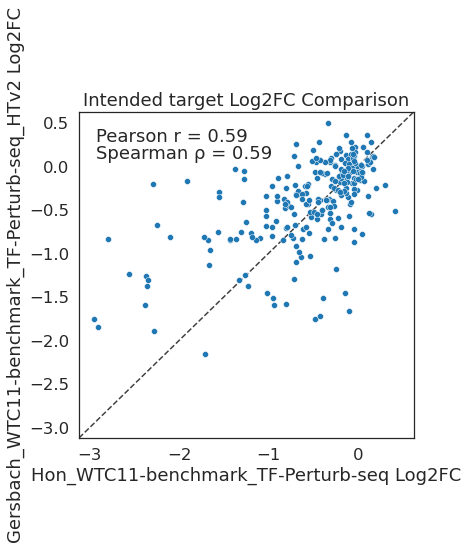

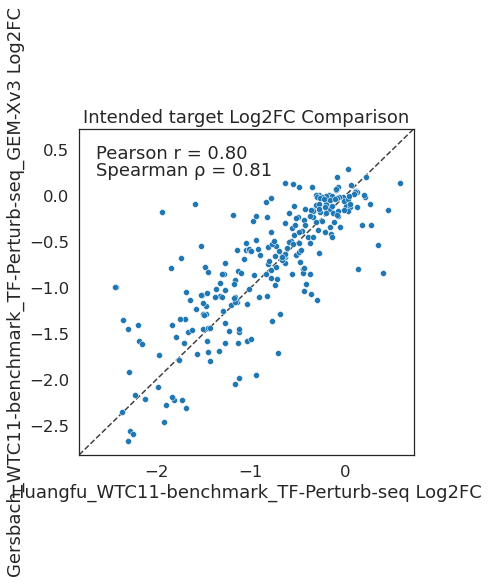

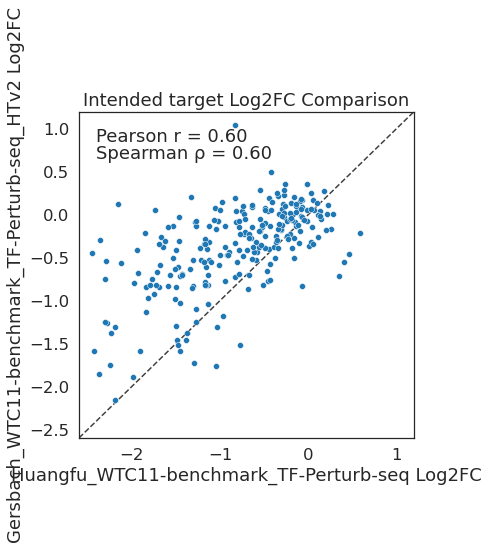

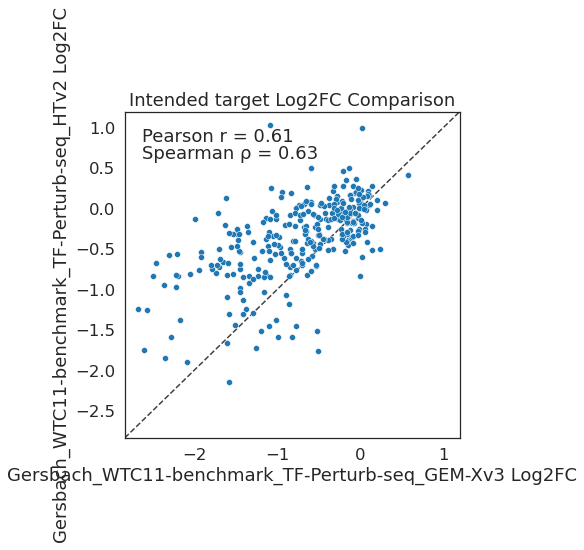

In [65]:
with sns.plotting_context("notebook", font_scale=1.5):
    # Scatterplot of log2FC for each pair of datasets
    for i, dataset1 in enumerate(dataset_order):
        for j, dataset2 in enumerate(dataset_order):
            if i >= j:
                continue
            df1 = all_res_df[all_res_df["dataset"] == dataset1]
            df2 = all_res_df[all_res_df["dataset"] == dataset2]
            merged = pd.merge(df1, df2, on="guide_id", suffixes=(f"_{dataset1}", f"_{dataset2}"))
            if merged.empty:
                continue
            plt.figure(figsize=(6, 6))
            sns.scatterplot(data=merged, x=f"log2_fc_{dataset1}", y=f"log2_fc_{dataset2}")
            plt.title(f"Intended target Log2FC Comparison")
            plt.xlabel(f"{dataset1} Log2FC")
            plt.ylabel(f"{dataset2} Log2FC")
            plt.grid(False)

            # Add diagonal line
            lims = [min(plt.xlim()[0], plt.ylim()[0]), max(plt.xlim()[1], plt.ylim()[1])]
            plt.plot(lims, lims, 'k--', alpha=0.75, zorder=0)
            plt.xlim(lims)
            plt.ylim(lims)

            # Drop missing values for correlation calculation
            merged = merged.dropna(subset=[f"log2_fc_{dataset1}", f"log2_fc_{dataset2}"])
            
            # Add correlation coefficients: pearson and spearman
            corr = np.corrcoef(merged[f"log2_fc_{dataset1}"], merged[f"log2_fc_{dataset2}"])[0, 1]
            plt.text(0.05, 0.95, f"Pearson r = {corr:.2f}", transform=plt.gca().transAxes,
                    verticalalignment='top')
            spearman_corr = merged[[f"log2_fc_{dataset1}", f"log2_fc_{dataset2}"]].corr(method='spearman').iloc[0, 1]
            plt.text(0.05, 0.90, f"Spearman ρ = {spearman_corr:.2f}", transform=plt.gca().transAxes,
                    verticalalignment='top')
            plt.show()

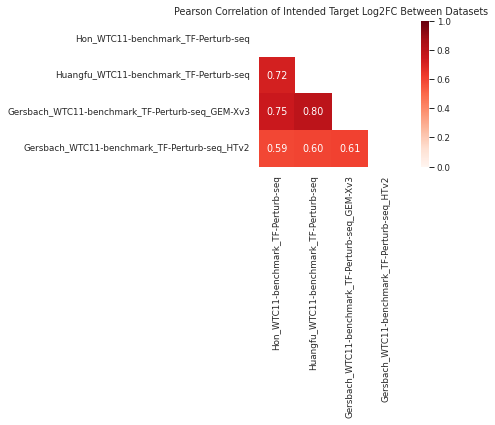

In [67]:
# Make a heatmap of pearson correlations between datasets
corr_matrix = pd.DataFrame(index=dataset_order, columns=dataset_order, dtype=float)
for i, dataset1 in enumerate(dataset_order):
    for j, dataset2 in enumerate(dataset_order):
        df1 = all_res_df[all_res_df["dataset"] == dataset1]
        df2 = all_res_df[all_res_df["dataset"] == dataset2]
        merged = pd.merge(df1, df2, on="guide_id", suffixes=(f"_{dataset1}", f"_{dataset2}"))
        if merged.empty:
            corr_matrix.loc[dataset1, dataset2] = np.nan
        else:
            # Drop missing values for correlation calculation
            merged = merged.dropna(subset=[f"log2_fc_{dataset1}", f"log2_fc_{dataset2}"])
            corr = np.corrcoef(merged[f"log2_fc_{dataset1}"], merged[f"log2_fc_{dataset2}"])[0, 1]
            corr_matrix.loc[dataset1, dataset2] = corr

# Make a triangular heatmap with 2 decimal places
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix.astype(float), annot=True, cmap="Reds", vmin=0, vmax=1, square=True, mask=np.triu(np.ones(corr_matrix.shape)).astype(bool), fmt=".2f")
plt.title("Pearson Correlation of Intended Target Log2FC Between Datasets")
plt.tight_layout()

/cellar/users/aklie/opt/miniconda3/envs/get_data/lib/python3.7/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)
/cellar/users/aklie/opt/miniconda3/envs/get_data/lib/python3.7/site-packages/ipykernel_launcher.py:80: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/cellar/users/aklie/opt/miniconda3/envs/get_data/lib/python3.7/site-packages/ipykernel_launcher.py:80: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


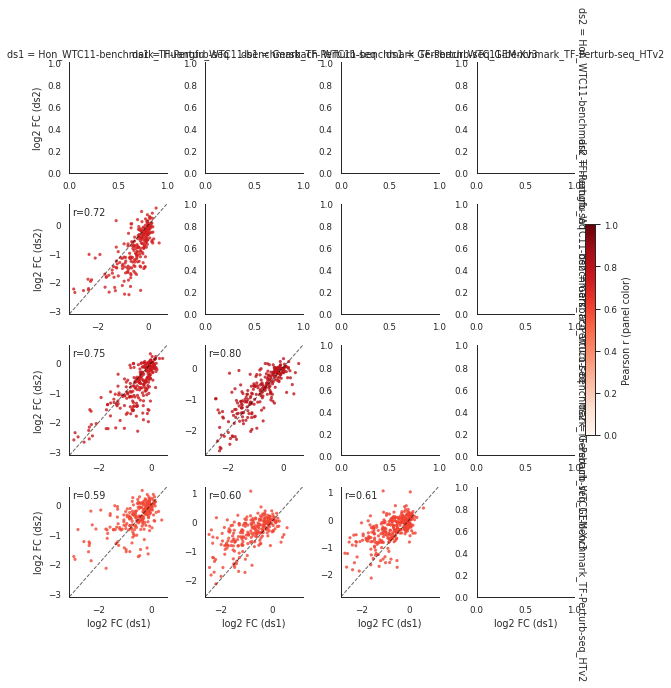

In [70]:
import matplotlib as mpl

# -------------------------
# Build pairwise scatter DF
# -------------------------
pair_rows = []
for i, ds1 in enumerate(dataset_order):
    for j, ds2 in enumerate(dataset_order):
        if i >= j:
            continue

        d1 = all_res_df.loc[all_res_df["dataset"] == ds1, ["guide_id", "log2_fc"]].rename(columns={"log2_fc": "x"})
        d2 = all_res_df.loc[all_res_df["dataset"] == ds2, ["guide_id", "log2_fc"]].rename(columns={"log2_fc": "y"})
        m = d1.merge(d2, on="guide_id", how="inner")

        if m.empty:
            continue

        # Drop missing values for correlation calculation
        m = m.dropna(subset=["x", "y"])
        r = np.corrcoef(m["x"], m["y"])[0, 1]
        m["ds1"] = ds1
        m["ds2"] = ds2
        m["r"] = r  # panel-level correlation; same value for all points in this panel
        pair_rows.append(m)

pair_df = pd.concat(pair_rows, ignore_index=True)

# -----------------------------------
# FacetGrid: pairwise scatter panels
# -----------------------------------
sns.set_context("paper")
sns.set_style("white")

norm = mpl.colors.Normalize(vmin=0, vmax=1)  # clip to [0,1] for Reds
cmap = plt.cm.Reds

def corr_colored_scatter(data, **kws):
    ax = plt.gca()

    r = float(data["r"].iloc[0])
    color = cmap(norm(np.clip(r, 0, 1)))

    ax.scatter(data["x"], data["y"], s=10, alpha=0.8, edgecolor="none", color=color)

    # y = x line using current limits
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    lo = min(xmin, ymin)
    hi = max(xmax, ymax)
    ax.plot([lo, hi], [lo, hi], linestyle="--", linewidth=1, color="k", alpha=0.6)
    ax.set_xlim(lo, hi)
    ax.set_ylim(lo, hi)

    # optional: annotate r
    ax.text(0.03, 0.97, f"r={r:.2f}", transform=ax.transAxes, va="top", ha="left")

g = sns.FacetGrid(
    pair_df,
    row="ds2",
    col="ds1",
    row_order=dataset_order,
    col_order=dataset_order,
    sharex=False,
    sharey=False,
    height=2.0,
    aspect=1.0,
    margin_titles=True
)

g.map_dataframe(corr_colored_scatter)

g.set_axis_labels("log2 FC (ds1)", "log2 FC (ds2)")

# Add a colorbar to show how color maps to correlation
sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
g.fig.colorbar(sm, ax=g.axes, fraction=0.02, pad=0.02, label="Pearson r (panel color)")

plt.tight_layout()
plt.show()


/cellar/users/aklie/opt/miniconda3/envs/get_data/lib/python3.7/site-packages/ipykernel_launcher.py:166: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


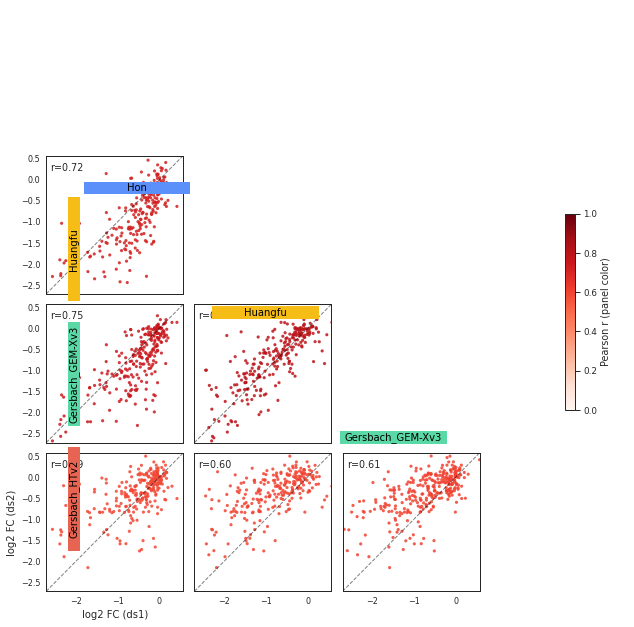

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Rectangle

# -------------------------
# Settings
# -------------------------
suffix = "_WTC11-benchmark_TF-Perturb-seq"

def short_name(ds):
    return ds.replace(suffix, "")

# your provided colors
dataset_colors = {
    "Hon_WTC11-benchmark_TF-Perturb-seq": "#5B8FF9",
    "Huangfu_WTC11-benchmark_TF-Perturb-seq": "#F6BD16",
    "Gersbach_WTC11-benchmark_TF-Perturb-seq_GEM-Xv3": "#5AD8A6",
    "Gersbach_WTC11-benchmark_TF-Perturb-seq_HTv2": "#E86452",
}

# Correlation colormap for panels
norm = mpl.colors.Normalize(vmin=0, vmax=1)
cmap = plt.cm.Reds

# -------------------------
# Precompute per-pair merged tables + correlations
# key = (i, j) where i=row (ds2), j=col (ds1), only stored for i>j
# -------------------------
pair_data = {}
n = len(dataset_order)

for i, ds2 in enumerate(dataset_order):      # row dataset
    d2 = (all_res_df.loc[all_res_df["dataset"] == ds2, ["guide_id", "log2_fc"]]
          .rename(columns={"log2_fc": "y"}))

    for j, ds1 in enumerate(dataset_order):  # col dataset
        if i <= j:
            continue

        d1 = (all_res_df.loc[all_res_df["dataset"] == ds1, ["guide_id", "log2_fc"]]
              .rename(columns={"log2_fc": "x"}))

        m = d1.merge(d2, on="guide_id", how="inner")
        # Drop missing values for correlation calculation
        m = m.dropna(subset=["x", "y"])
        r = np.nan if m.empty else np.corrcoef(m["x"], m["y"])[0, 1]
        pair_data[(i, j)] = {"df": m, "r": r}

# global limits so y=x is consistent across panels
all_vals = []
for v in pair_data.values():
    if not v["df"].empty:
        all_vals.append(v["df"][["x", "y"]].to_numpy().ravel())
all_vals = np.concatenate(all_vals) if len(all_vals) else np.array([0, 1])
lo, hi = np.nanpercentile(all_vals, [0.5, 99.5])
pad = 0.05 * (hi - lo)
lo -= pad
hi += pad

# -------------------------
# Draw grid
# -------------------------
fig, axes = plt.subplots(n, n, figsize=(2.2*n, 2.2*n), sharex=True, sharey=True)

for i in range(n):          # row
    for j in range(n):      # col
        ax = axes[i, j]

        # hide diagonal + upper triangle
        if i <= j:
            ax.set_axis_off()
            continue

        entry = pair_data[(i, j)]  # now guaranteed to exist
        m = entry["df"]
        r = entry["r"]

        # Panel color by correlation
        if np.isnan(r):
            panel_color = (0.9, 0.9, 0.9, 1.0)
        else:
            panel_color = cmap(norm(np.clip(r, 0, 1)))

        if not m.empty:
            ax.scatter(m["x"], m["y"], s=10, alpha=0.85, edgecolor="none", color=panel_color)

        # y = x line with global limits
        ax.plot([lo, hi], [lo, hi], linestyle="--", linewidth=1, color="k", alpha=0.5)
        ax.set_xlim(lo, hi)
        ax.set_ylim(lo, hi)

        if not np.isnan(r):
            ax.text(0.03, 0.95, f"r={r:.2f}", transform=ax.transAxes, va="top", ha="left")

        ax.tick_params(length=2, labelsize=8)


# axis labels only on left + bottom
for i in range(n):
    for j in range(n):
        ax = axes[i, j]
        if not ax.axison:
            continue
        if j != 0:
            ax.set_ylabel("")
        if i != n-1:
            ax.set_xlabel("")

axes[n-1, 0].set_xlabel("log2 FC (ds1)", fontsize=10)
axes[n-1, 0].set_ylabel("log2 FC (ds2)", fontsize=10)

# -------------------------
# Add dataset color strips (top and left)
# -------------------------
strip_h = 0.02  # fraction of figure height
strip_w = 0.02  # fraction of figure width

# top strips (columns)
for j, ds in enumerate(dataset_order):
    # find top-most visible axis in this column (first row where i>j -> i=j+1)
    i = j + 1
    if i >= n:
        continue
    ax = axes[i, j]
    bb = ax.get_position()

    # rectangle above the column
    rect = Rectangle((bb.x0, bb.y1 + 0.005), bb.width, strip_h,
                     transform=fig.transFigure, clip_on=False,
                     facecolor=dataset_colors.get(ds, "lightgray"), edgecolor="none")
    fig.add_artist(rect)

    # text centered in strip
    fig.text(bb.x0 + bb.width/2, bb.y1 + 0.005 + strip_h/2,
             short_name(ds), ha="center", va="center",
             fontsize=10, color="black")

# left strips (rows)
for i, ds in enumerate(dataset_order):
    # find left-most visible axis in this row (first col where j<i -> j=0 if i>0)
    if i == 0:
        continue
    ax = axes[i, 0]
    bb = ax.get_position()

    rect = Rectangle((bb.x0 - strip_w - 0.005, bb.y0), strip_w, bb.height,
                     transform=fig.transFigure, clip_on=False,
                     facecolor=dataset_colors.get(ds, "lightgray"), edgecolor="none")
    fig.add_artist(rect)

    # text rotated, centered in strip
    fig.text(bb.x0 - strip_w/2 - 0.005, bb.y0 + bb.height/2,
             short_name(ds), ha="center", va="center",
             rotation=90, fontsize=10, color="black")

# -------------------------
# Colorbar for correlation->Reds mapping
# -------------------------
sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = fig.colorbar(sm, ax=axes, fraction=0.02, pad=0.02)
cbar.set_label("Pearson r (panel color)")

plt.tight_layout()

#plt.savefig(os.path.join(path_out, "intended_target_log2fc_pairwise_scatter_correlation_colored_panels.pdf"), dpi=300)


# DONE!

---